In [1]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor
import multiprocessing
import matplotlib.pyplot as plt
import numpy as np

# running headless
options = Options()
options.headless = True

#browser = webdriver.Firefox(options=options)
#browser.get('https://socialblade.com/youtube/top/country/dk')
#browser.implicitly_wait(3)



In [17]:
contries = ['dk', 'fi', 'is', 'no', 'se']

def total_views_top_250_by_country(country_code):
    views = 0
    url = 'https://socialblade.com/youtube/top/country/{}'.format(country_code)
    browser = webdriver.Firefox(options=options)
    browser.get(url)
    browser.implicitly_wait(3)
    
    for i in tqdm(range(5, 255)):
        div = browser.find_element_by_xpath('/html/body/div[11]/div[2]/div[{}]'.format(i))
        data_list = div.find_elements_by_tag_name('div')
        views += int(data_list[5].text.replace(',', ''))
    
        #element = div.find_element_by_xpath('.//div[6]')
        #print(element.text)
        
    #return {'country': country_code, 'views': views}
    return country_code, views

def total_views_list(func, args, workers=multiprocessing.cpu_count()):
    with ProcessPoolExecutor(workers) as ex:
        res = ex.map(func, args)
        return list(res)
    
    #with ThreadPoolExecutor(len(args)) as ex:
        #res = tqdm(ex.map(total_views_top_250_by_country, contries), total=len(contries))
        #return list(res)

data = total_views_list(total_views_top_250_by_country, contries)
print(data)
    
    

100%|██████████| 250/250 [00:11<00:00, 20.84it/s]


[('dk', 16922840923), ('fi', 26459686198), ('is', 3742427761), ('no', 39403924582), ('se', 51306325291)]


<IPython.core.display.Javascript object>


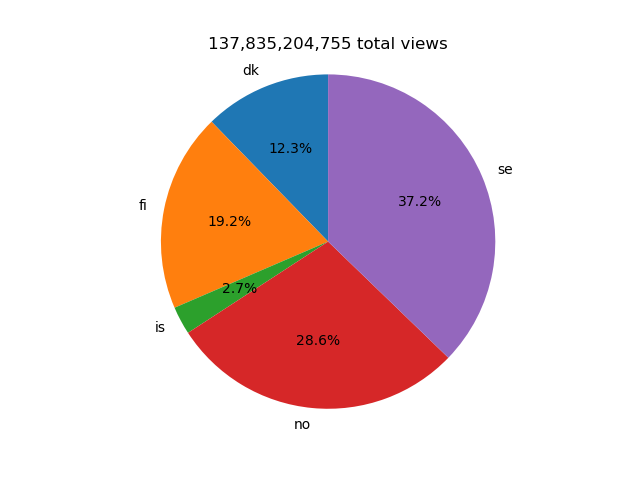

Text(0.5, 1.0, '137,835,204,755 total views')

In [18]:
%matplotlib notebook
labels, views = zip(*data)
total_views = sum(views)
#explode = (0, 0, 0, 0, 0.1)  # only "explode" the 5th slice (i.e. 'se')
fig1, ax1 = plt.subplots()
ax1.pie(views, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('{} total views'.format(f'{total_views:,}'))

In [26]:
def channel_types_list():
    channel_types = []
    url = 'https://socialblade.com/youtube/top/'
    browser = webdriver.Firefox(options=options)
    browser.get(url)
    browser.implicitly_wait(3)
    
    div = browser.find_element_by_xpath('/html/body/div[11]/div[1]/div[8]')
    links = div.find_elements_by_tag_name('a')
    for link in tqdm(links):
        name = link.text
        href = link.get_attribute('href')
        channel_types.append((name, href))
        
    browser.quit()
    
    return channel_types


def total_uploads_by_channel_type(url, channel_type_name):
    uploads = 0
    browser = webdriver.Firefox(options=options)
    browser.get(url)
    browser.implicitly_wait(3)
    
    for i in tqdm(range(5, 255)):
        try:
            div = browser.find_element_by_xpath('/html/body/div[11]/div[2]/div[{}]'.format(i))
            row = div.find_elements_by_tag_name('div')
            channel_name_raw = row[2].text
            value_raw = row[3].text
            
            if value_raw == '--' and channel_name_raw == '':
                raise Exception('No data for #{} at {}'.format(i, url))
            
            if value_raw == '--':
                raise Exception('No uploads for #{} at {}'.format(i, url))
            
            uploads += int(value_raw.replace(',', ''))
            
        except Exception as e:
            print(e)
            
    
    browser.quit()
    
    return channel_type_name, uploads


channel_types_list = channel_types_list()
channel_names, channel_urls = zip(*channel_types_list)
#for channel in channel_types_list:
    #res = total_uploads_by_channel_type(channel[1], channel[0])
    #print(res)
    
def total_uploads_list(func, channel_urls, channel_names, workers=multiprocessing.cpu_count()):
    with ProcessPoolExecutor(workers) as ex:
        res = ex.map(func, channel_urls, channel_names)
        return list(res)

total_uploads_list = total_uploads_list(total_uploads_by_channel_type, channel_urls, channel_names)
print(total_uploads_list)

    

 40%|████      | 101/250 [00:04<00:09, 15.54it/s]

No uploads for #111 at https://socialblade.com/youtube/top/category/shows


 42%|████▏     | 105/250 [00:05<00:08, 17.19it/s]

No uploads for #114 at https://socialblade.com/youtube/top/category/shows


 54%|█████▎    | 134/250 [00:06<00:06, 17.23it/s]

No data for #137 at https://socialblade.com/youtube/top/category/shows


 54%|█████▍    | 136/250 [00:07<00:06, 16.62it/s]

No data for #138 at https://socialblade.com/youtube/top/category/shows


  6%|▋         | 16/250 [00:01<00:22, 10.41it/s]

No data for #139 at https://socialblade.com/youtube/top/category/shows


 55%|█████▌    | 138/250 [00:07<00:06, 16.64it/s]

No data for #140 at https://socialblade.com/youtube/top/category/shows


 53%|█████▎    | 133/250 [00:06<00:06, 17.29it/s]

No data for #141 at https://socialblade.com/youtube/top/category/shows


 56%|█████▌    | 140/250 [00:07<00:06, 16.90it/s]

No data for #142 at https://socialblade.com/youtube/top/category/shows


  9%|▉         | 22/250 [00:01<00:15, 14.78it/s]

No data for #143 at https://socialblade.com/youtube/top/category/shows


 57%|█████▋    | 142/250 [00:07<00:06, 17.04it/s]

No data for #144 at https://socialblade.com/youtube/top/category/shows


 55%|█████▍    | 137/250 [00:06<00:06, 17.51it/s]

No data for #145 at https://socialblade.com/youtube/top/category/shows


 11%|█         | 28/250 [00:01<00:11, 19.68it/s]]

No data for #146 at https://socialblade.com/youtube/top/category/shows


 56%|█████▌    | 139/250 [00:07<00:06, 17.61it/s]

No data for #147 at https://socialblade.com/youtube/top/category/shows


 12%|█▏        | 31/250 [00:01<00:10, 21.06it/s]]

No data for #148 at https://socialblade.com/youtube/top/category/shows


 56%|█████▋    | 141/250 [00:07<00:06, 17.09it/s]

No data for #149 at https://socialblade.com/youtube/top/category/shows


 14%|█▎        | 34/250 [00:01<00:09, 22.10it/s]]

No data for #150 at https://socialblade.com/youtube/top/category/shows


 57%|█████▋    | 143/250 [00:07<00:06, 17.06it/s]

No data for #151 at https://socialblade.com/youtube/top/category/shows


 60%|██████    | 150/250 [00:07<00:05, 17.13it/s]

No data for #152 at https://socialblade.com/youtube/top/category/shows


 58%|█████▊    | 145/250 [00:07<00:06, 17.06it/s]

No data for #153 at https://socialblade.com/youtube/top/category/shows


 61%|██████    | 152/250 [00:07<00:05, 16.85it/s]

No data for #154 at https://socialblade.com/youtube/top/category/shows


 59%|█████▉    | 147/250 [00:07<00:06, 16.83it/s]

No data for #155 at https://socialblade.com/youtube/top/category/shows


 62%|██████▏   | 154/250 [00:08<00:06, 15.15it/s]

No data for #156 at https://socialblade.com/youtube/top/category/shows


 18%|█▊        | 46/250 [00:02<00:08, 24.97it/s]]

No data for #157 at https://socialblade.com/youtube/top/category/shows


 62%|██████▏   | 156/250 [00:08<00:05, 16.00it/s]

No data for #158 at https://socialblade.com/youtube/top/category/shows

 60%|██████    | 151/250 [00:07<00:05, 17.24it/s]

 20%|█▉        | 49/250 [00:02<00:08, 24.87it/s]

No data for #159 at https://socialblade.com/youtube/top/category/shows


 61%|██████    | 153/250 [00:07<00:05, 16.97it/s]

No data for #160 at https://socialblade.com/youtube/top/category/shows


 21%|██        | 52/250 [00:02<00:07, 24.90it/s]

No data for #161 at https://socialblade.com/youtube/top/category/shows


 62%|██████▏   | 155/250 [00:08<00:05, 17.56it/s]

No data for #162 at https://socialblade.com/youtube/top/category/shows


 22%|██▏       | 55/250 [00:02<00:07, 25.59it/s]

No data for #163 at https://socialblade.com/youtube/top/category/shows


 63%|██████▎   | 157/250 [00:08<00:05, 17.26it/s]

No data for #164 at https://socialblade.com/youtube/top/category/shows


 23%|██▎       | 58/250 [00:02<00:07, 25.15it/s]

No data for #165 at https://socialblade.com/youtube/top/category/shows


 64%|██████▎   | 159/250 [00:08<00:05, 17.35it/s]

No data for #166 at https://socialblade.com/youtube/top/category/shows


 24%|██▍       | 61/250 [00:02<00:07, 25.72it/s]

No data for #167 at https://socialblade.com/youtube/top/category/shows


 64%|██████▍   | 161/250 [00:08<00:05, 17.55it/s]

No data for #168 at https://socialblade.com/youtube/top/category/shows


 67%|██████▋   | 168/250 [00:08<00:04, 17.41it/s]

No data for #169 at https://socialblade.com/youtube/top/category/shows


 65%|██████▌   | 163/250 [00:08<00:04, 17.61it/s]

No data for #170 at https://socialblade.com/youtube/top/category/shows


 27%|██▋       | 67/250 [00:03<00:07, 24.51it/s]

No data for #171 at https://socialblade.com/youtube/top/category/shows


 68%|██████▊   | 170/250 [00:09<00:05, 14.47it/s]

No data for #172 at https://socialblade.com/youtube/top/category/shows


 67%|██████▋   | 167/250 [00:08<00:04, 17.33it/s]

No data for #173 at https://socialblade.com/youtube/top/category/shows


 68%|██████▊   | 169/250 [00:08<00:04, 16.28it/s]

No data for #174 at https://socialblade.com/youtube/top/category/shows


 29%|██▉       | 73/250 [00:03<00:07, 24.31it/s]]

No data for #175 at https://socialblade.com/youtube/top/category/shows

 68%|██████▊   | 169/250 [00:08<00:04, 17.13it/s]

 68%|██████▊   | 171/250 [00:08<00:04, 17.22it/s]

No data for #176 at https://socialblade.com/youtube/top/category/shows


 70%|███████   | 176/250 [00:09<00:04, 15.29it/s]

No data for #177 at https://socialblade.com/youtube/top/category/shows


 32%|███▏      | 79/250 [00:03<00:07, 23.68it/s]]

No data for #178 at https://socialblade.com/youtube/top/category/shows


 69%|██████▉   | 173/250 [00:09<00:06, 12.82it/s]

No data for #179 at https://socialblade.com/youtube/top/category/shows


 33%|███▎      | 82/250 [00:03<00:08, 20.38it/s]]

No data for #180 at https://socialblade.com/youtube/top/category/shows


 70%|███████   | 175/250 [00:09<00:05, 12.64it/s]

No data for #181 at https://socialblade.com/youtube/top/category/shows


 34%|███▍      | 85/250 [00:03<00:08, 20.15it/s]]

No data for #182 at https://socialblade.com/youtube/top/category/shows


 71%|███████   | 177/250 [00:09<00:05, 13.01it/s]

No data for #183 at https://socialblade.com/youtube/top/category/shows


 35%|███▌      | 88/250 [00:04<00:08, 19.94it/s]]

No data for #184 at https://socialblade.com/youtube/top/category/shows


 72%|███████▏  | 179/250 [00:09<00:05, 13.35it/s]

No data for #185 at https://socialblade.com/youtube/top/category/shows


 72%|███████▏  | 181/250 [00:09<00:05, 12.32it/s]

No data for #186 at https://socialblade.com/youtube/top/category/shows


 74%|███████▍  | 186/250 [00:10<00:05, 12.45it/s]

No data for #187 at https://socialblade.com/youtube/top/category/shows


 73%|███████▎  | 183/250 [00:10<00:05, 12.65it/s]

No data for #188 at https://socialblade.com/youtube/top/category/shows


 75%|███████▌  | 188/250 [00:10<00:04, 12.87it/s]

No data for #189 at https://socialblade.com/youtube/top/category/shows


 74%|███████▍  | 185/250 [00:10<00:04, 13.30it/s]

No data for #190 at https://socialblade.com/youtube/top/category/shows


 76%|███████▌  | 190/250 [00:10<00:04, 13.45it/s]

No data for #191 at https://socialblade.com/youtube/top/category/shows


 75%|███████▍  | 187/250 [00:10<00:04, 14.19it/s]

No data for #192 at https://socialblade.com/youtube/top/category/shows


 77%|███████▋  | 192/250 [00:10<00:04, 14.33it/s]

No data for #193 at https://socialblade.com/youtube/top/category/shows


 76%|███████▌  | 189/250 [00:10<00:04, 14.83it/s]

No data for #194 at https://socialblade.com/youtube/top/category/shows


 78%|███████▊  | 194/250 [00:10<00:03, 14.69it/s]

No data for #195 at https://socialblade.com/youtube/top/category/shows


 40%|████      | 101/250 [00:04<00:08, 18.08it/s]

No data for #196 at https://socialblade.com/youtube/top/category/shows


 78%|███████▊  | 196/250 [00:10<00:03, 15.09it/s]

No data for #197 at https://socialblade.com/youtube/top/category/shows


 42%|████▏     | 104/250 [00:05<00:07, 18.80it/s]

No data for #198 at https://socialblade.com/youtube/top/category/shows


 77%|███████▋  | 193/250 [00:10<00:03, 14.91it/s]

No data for #199 at https://socialblade.com/youtube/top/category/shows


 43%|████▎     | 107/250 [00:05<00:07, 18.90it/s]

No data for #200 at https://socialblade.com/youtube/top/category/shows


 78%|███████▊  | 195/250 [00:10<00:03, 14.48it/s]

No data for #201 at https://socialblade.com/youtube/top/category/shows


 44%|████▎     | 109/250 [00:05<00:07, 18.57it/s]

No data for #202 at https://socialblade.com/youtube/top/category/shows


 79%|███████▉  | 197/250 [00:10<00:03, 14.81it/s]

No data for #203 at https://socialblade.com/youtube/top/category/shows


 45%|████▍     | 112/250 [00:05<00:07, 19.47it/s]

No data for #204 at https://socialblade.com/youtube/top/category/shows


 80%|███████▉  | 199/250 [00:10<00:03, 14.99it/s]

No data for #205 at https://socialblade.com/youtube/top/category/shows


 46%|████▌     | 115/250 [00:05<00:06, 19.62it/s]

No data for #206 at https://socialblade.com/youtube/top/category/shows


 80%|████████  | 201/250 [00:11<00:03, 15.28it/s]

No data for #207 at https://socialblade.com/youtube/top/category/shows


 47%|████▋     | 118/250 [00:05<00:06, 20.35it/s]

No data for #208 at https://socialblade.com/youtube/top/category/shows


 81%|████████  | 203/250 [00:11<00:03, 15.22it/s]

No data for #209 at https://socialblade.com/youtube/top/category/shows


 48%|████▊     | 121/250 [00:05<00:06, 20.32it/s]

No data for #210 at https://socialblade.com/youtube/top/category/shows


 82%|████████▏ | 205/250 [00:11<00:03, 14.79it/s]

No data for #211 at https://socialblade.com/youtube/top/category/shows


 50%|████▉     | 124/250 [00:06<00:06, 20.49it/s]

No data for #212 at https://socialblade.com/youtube/top/category/shows


 85%|████████▍ | 212/250 [00:12<00:02, 15.03it/s]

No data for #213 at https://socialblade.com/youtube/top/category/shows


 51%|█████     | 127/250 [00:06<00:06, 20.33it/s]

No data for #214 at https://socialblade.com/youtube/top/category/shows


 84%|████████▎ | 209/250 [00:11<00:02, 14.81it/s]

No data for #215 at https://socialblade.com/youtube/top/category/shows


 84%|████████▍ | 211/250 [00:11<00:02, 14.57it/s]

No data for #216 at https://socialblade.com/youtube/top/category/shows


 84%|████████▍ | 211/250 [00:11<00:02, 15.26it/s]

No data for #217 at https://socialblade.com/youtube/top/category/shows


 85%|████████▌ | 213/250 [00:12<00:02, 14.83it/s]

No data for #218 at https://socialblade.com/youtube/top/category/shows


 53%|█████▎    | 133/250 [00:06<00:05, 19.94it/s]

No data for #219 at https://socialblade.com/youtube/top/category/shows


 86%|████████▌ | 215/250 [00:12<00:02, 14.99it/s]

No data for #220 at https://socialblade.com/youtube/top/category/shows


 54%|█████▍    | 136/250 [00:06<00:05, 20.03it/s]

No data for #221 at https://socialblade.com/youtube/top/category/shows


 87%|████████▋ | 217/250 [00:12<00:02, 14.99it/s]

No data for #222 at https://socialblade.com/youtube/top/category/shows

 89%|████████▉ | 222/250 [00:12<00:01, 15.69it/s]

 56%|█████▌    | 139/250 [00:06<00:05, 20.15it/s]

No data for #223 at https://socialblade.com/youtube/top/category/shows


 88%|████████▊ | 219/250 [00:12<00:02, 15.42it/s]

No data for #224 at https://socialblade.com/youtube/top/category/shows
No data for #225 at https://socialblade.com/youtube/top/category/shows


 88%|████████▊ | 221/250 [00:12<00:01, 15.36it/s]

No data for #226 at https://socialblade.com/youtube/top/category/shows

 90%|█████████ | 226/250 [00:12<00:01, 14.93it/s]

 58%|█████▊    | 144/250 [00:07<00:05, 19.60it/s]

No data for #227 at https://socialblade.com/youtube/top/category/shows


 91%|█████████ | 228/250 [00:13<00:01, 14.83it/s]

No data for #228 at https://socialblade.com/youtube/top/category/shows


 58%|█████▊    | 146/250 [00:07<00:05, 18.84it/s]

No data for #229 at https://socialblade.com/youtube/top/category/shows


 59%|█████▉    | 148/250 [00:07<00:05, 18.25it/s]

No data for #230 at https://socialblade.com/youtube/top/category/shows

 92%|█████████▏| 230/250 [00:13<00:01, 14.02it/s]

 90%|█████████ | 225/250 [00:12<00:01, 14.01it/s]

No data for #231 at https://socialblade.com/youtube/top/category/shows


 93%|█████████▎| 232/250 [00:13<00:01, 14.02it/s]

No data for #232 at https://socialblade.com/youtube/top/category/shows


 61%|██████    | 152/250 [00:07<00:05, 18.47it/s]

No data for #233 at https://socialblade.com/youtube/top/category/shows


 94%|█████████▎| 234/250 [00:13<00:01, 13.86it/s]

No data for #234 at https://socialblade.com/youtube/top/category/shows


 62%|██████▏   | 154/250 [00:07<00:05, 17.53it/s]

No data for #235 at https://socialblade.com/youtube/top/category/shows


 62%|██████▏   | 156/250 [00:07<00:05, 17.27it/s]

No data for #236 at https://socialblade.com/youtube/top/category/shows


 92%|█████████▏| 231/250 [00:13<00:01, 12.91it/s]

No data for #237 at https://socialblade.com/youtube/top/category/shows


 95%|█████████▌| 238/250 [00:13<00:00, 13.76it/s]

No data for #238 at https://socialblade.com/youtube/top/category/shows


 64%|██████▍   | 160/250 [00:07<00:05, 17.58it/s]

No data for #239 at https://socialblade.com/youtube/top/category/shows


 96%|█████████▌| 240/250 [00:13<00:00, 13.94it/s]

No data for #240 at https://socialblade.com/youtube/top/category/shows


 65%|██████▍   | 162/250 [00:08<00:04, 17.82it/s]

No data for #241 at https://socialblade.com/youtube/top/category/shows


 95%|█████████▍| 237/250 [00:13<00:00, 13.98it/s]

No data for #242 at https://socialblade.com/youtube/top/category/shows


 95%|█████████▍| 237/250 [00:13<00:00, 13.77it/s]

No data for #243 at https://socialblade.com/youtube/top/category/shows


 96%|█████████▌| 239/250 [00:13<00:00, 13.83it/s]

No data for #244 at https://socialblade.com/youtube/top/category/shows


 67%|██████▋   | 168/250 [00:08<00:04, 17.59it/s]

No data for #245 at https://socialblade.com/youtube/top/category/shows


 96%|█████████▋| 241/250 [00:13<00:00, 13.98it/s]

No data for #246 at https://socialblade.com/youtube/top/category/shows

 98%|█████████▊| 246/250 [00:14<00:00, 12.91it/s]

 68%|██████▊   | 170/250 [00:08<00:04, 17.81it/s]

No data for #247 at https://socialblade.com/youtube/top/category/shows


 99%|█████████▉| 248/250 [00:14<00:00, 13.42it/s]

No data for #248 at https://socialblade.com/youtube/top/category/shows


 69%|██████▉   | 172/250 [00:08<00:05, 15.12it/s]

No data for #249 at https://socialblade.com/youtube/top/category/shows


100%|██████████| 250/250 [00:14<00:00, 17.00it/s]


No data for #250 at https://socialblade.com/youtube/top/category/shows


 70%|██████▉   | 174/250 [00:08<00:05, 14.56it/s]

No data for #251 at https://socialblade.com/youtube/top/category/shows


 99%|█████████▉| 247/250 [00:14<00:00, 12.39it/s]

No data for #252 at https://socialblade.com/youtube/top/category/shows

 70%|███████   | 176/250 [00:08<00:05, 14.55it/s]

 99%|█████████▉| 247/250 [00:14<00:00, 12.36it/s]

No data for #253 at https://socialblade.com/youtube/top/category/shows


 71%|███████   | 178/250 [00:09<00:04, 15.33it/s]

No data for #254 at https://socialblade.com/youtube/top/category/shows


100%|██████████| 250/250 [00:09<00:00, 27.16it/s]


[('AUTO & VEHICLES', 287390), ('COMEDY', 298702), ('EDUCATION', 332597), ('ENTERTAINMENT', 3273913), ('FILM', 421692), ('GAMING', 591440), ('HOW TO & STYLE', 343573), ('MADE FOR KIDS', 213665), ('MUSIC', 581081), ('NEWS & POLITICS', 13644924), ('NONPROFIT & ACTIVISM', 665603), ('PEOPLE & BLOGS', 477665), ('PETS & ANIMALS', 197849), ('SCIENCE & TECHNOLOGY', 295970), ('SHOWS', 25284), ('SPORTS', 1799047), ('TRAVEL', 382910)]


<IPython.core.display.Javascript object>


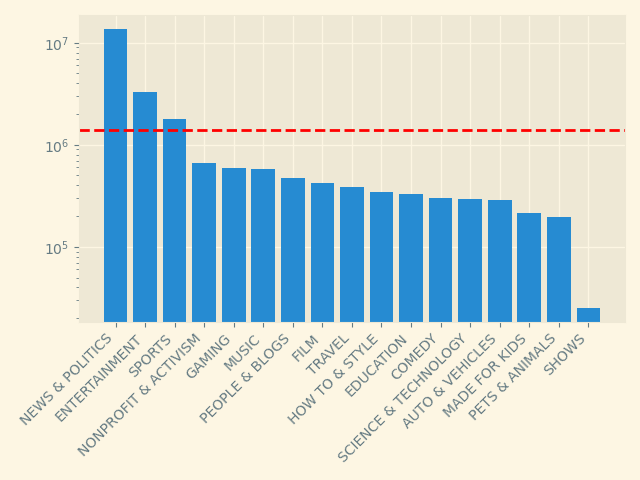

In [44]:
%matplotlib notebook

#data
data = total_uploads_list
data.sort(key=lambda tup: tup[1], reverse=True) # sorting data by avg_vowels
channels, uploads = zip(*data)
uploads_mean = np.mean(uploads)

# style
plt.style.use('Solarize_Light2')

# autolayout
plt.rcParams.update({'figure.autolayout': True})

# plot
fig, ax = plt.subplots()
ax.bar(channels, uploads, log=True)
#plt.bar(channels, uploads, width=0.5, align='center')
#plt.yscale('log')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
# median
ax.axhline(uploads_mean, ls='--', color='r')

1400984.5294117648
1400984.5294117648
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<IPython.core.display.Javascript object>


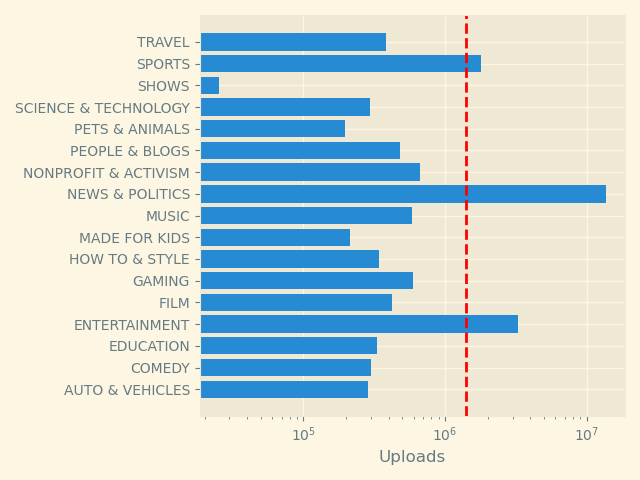

Text(0.5, 0, 'Uploads')

In [74]:
%matplotlib notebook

#data
channels, uploads = zip(*total_uploads_list)
uploads_mean = np.mean(uploads)

#change style
print(plt.style.available)
plt.style.use('Solarize_Light2')

#autolayout make rooms for labels
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots()
y_pos = np.arange(len(channels))
ax.barh(y_pos, uploads, align='center', log=True)

# Add a vertical line, here we set the style in the function call
ax.axvline(uploads_mean, ls='--', color='r')

ax.set_yticks(y_pos)
ax.set_yticklabels(channels)
ax.set_xlabel('Uploads')

In [14]:
def channel_types_top_250_by_country(country_code):
    channel_types = {}
    url = 'https://socialblade.com/youtube/top/country/{}'.format(country_code)
    browser = webdriver.Firefox(options=options)
    browser.get(url)
    browser.implicitly_wait(3)
    
    for i in tqdm(range(5, 255)):
        div = browser.find_element_by_xpath('/html/body/div[11]/div[2]/div[{}]'.format(i))
        row = div.find_elements_by_tag_name('div')
        channel_type_raw = row[2].find_element_by_tag_name('i').get_attribute('title').split(':')
        channel_type = channel_type_raw[1].strip().capitalize()
        if channel_type == "":
            channel_type = "Unknown"
        
        if channel_type not in channel_types:
            channel_types[channel_type] = 1
        else:
            channel_types[channel_type] += 1
            
    return channel_types

channel_types_top_250 = channel_types_top_250_by_country('dk')

100%|██████████| 250/250 [00:09<00:00, 26.61it/s]


<IPython.core.display.Javascript object>


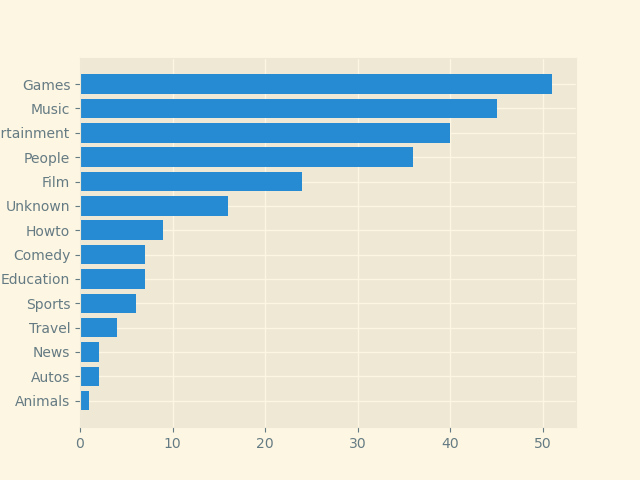

<BarContainer object of 14 artists>

In [24]:
%matplotlib notebook

# data
data_raw = channel_types_top_250
channels = sorted(data_raw, key=data_raw.get)
values = sorted(data_raw.values())

# style
plt.style.use('Solarize_Light2')

#plot
fig, ax = plt.subplots()
ax.barh(channels, values)
